In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.signal import find_peaks
import pywt

# 1. Data Preprocessing (Example)
data = pd.read_csv("C:/Users/abdulssekyanzi/EDA Dataset.csv/100.csv")
data = data.drop("Unnamed: 0", axis=1)
# Create a label column, replace with your actual label loading
data['label'] = np.random.randint(0, 4, size=len(data)) #example labels

# Feature Engineering Example
def extract_features(df):
    features = df[['MLII', 'V5']].copy()
    # Example statistical features
    features['MLII_mean'] = df['MLII'].mean()
    features['V5_std'] = df['V5'].std()
    # Example Wavelet feature extraction
    coeffs_MLII = pywt.wavedec(df['MLII'], 'db1', level=3)
    features['MLII_detail_1'] = np.mean(coeffs_MLII[1])
    return features

features = extract_features(data)

# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# 2. Unsupervised Learning (Example)
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(features_normalized)
features['cluster'] = cluster_labels # add cluster labels to features

# 3. Supervised Learning (Example)
X = features_normalized
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.24967692307692307


In [2]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.24      0.25     32452
           1       0.25      0.25      0.25     32801
           2       0.25      0.25      0.25     32435
           3       0.25      0.25      0.25     32312

    accuracy                           0.25    130000
   macro avg       0.25      0.25      0.25    130000
weighted avg       0.25      0.25      0.25    130000



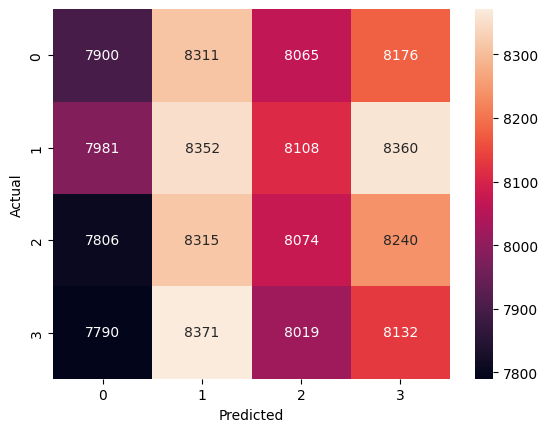

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()